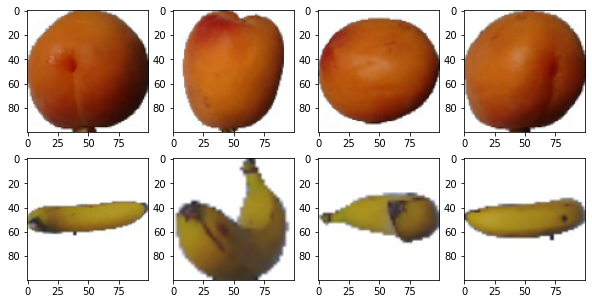

In [5]:
import matplotlib.pyplot as plt
import os
src_path = "data/train/"
sub_class = os.listdir(src_path)

fig = plt.figure(figsize=(10,5))
path = os.path.join(src_path,sub_class[0])
for i in range(4):
    plt.subplot(240 + 1 + i)
    img = plt.imread(os.path.join(path,str(i)+'.jpg'))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

path = os.path.join(src_path,sub_class[1])
for i in range(4,8):
    plt.subplot(240 + 1 + i)
    img = plt.imread(os.path.join(path,str(i)+'.jpg'))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [9]:
train_df = pd.read_csv('data/train_data.csv')
test_df = pd.read_csv('data/test_data.csv')
train_df['target'] = train_df['target'].astype(str)
train_df.head()

,img_code,target
0,66.jpg,0
1,88.jpg,0
2,41.jpg,1
3,71.jpg,0
4,46.jpg,1


In [11]:
src_path_train = "data/train/"
src_path_test = "data/test/"

train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [13]:
batch_size = 8
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=src_path_train,
    x_col="img_code",
    y_col="target",
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=src_path_train,
    x_col="img_code",
    y_col="target",
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=42
)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=src_path_test,
    x_col="img_code",
    target_size=(100, 100),
    batch_size=1,
    class_mode=None,
    shuffle=False,
)

Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames.


In [14]:
def prepare_model():
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(100, 100, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
    return model

In [18]:
model = prepare_model()
model.fit(train_generator,
                    validation_data = train_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=5)

ValueError: Asked to retrieve element 0, but the Sequence has length 0